# The Sparks Foundation

## Task Done By :- Pawan Kumar

## Problem Statement :-- 
##                      predicted score if a student studies for 9.25hrs/day

In [1]:
# All library import 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# data import

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.sample(5)

,Hours,Scores
2,3.2,27
20,2.7,30
5,1.5,20
13,3.3,42
6,9.2,88


In [4]:
# check missing value
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


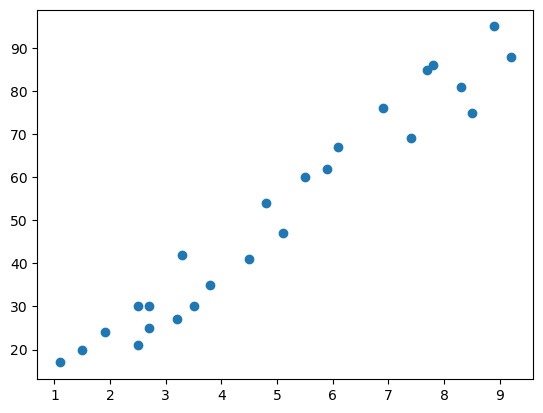

In [6]:
# check linearity
plt.scatter(data['Hours'],data['Scores'])

Text(0, 0.5, 'Score')

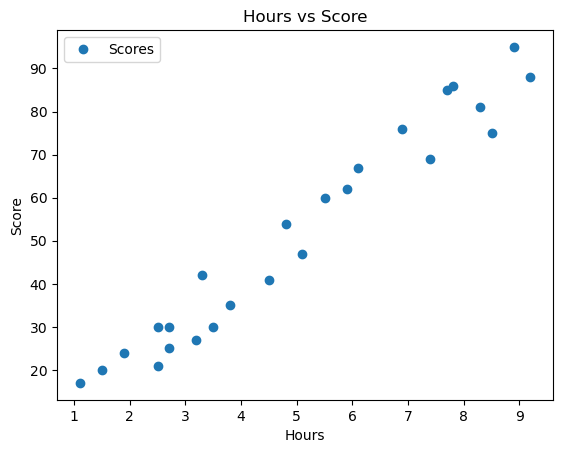

In [7]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Score')

In [8]:
# check correlation
data.corr().tail(1)

,Hours,Scores
Scores,0.976191,1.0


<AxesSubplot:>

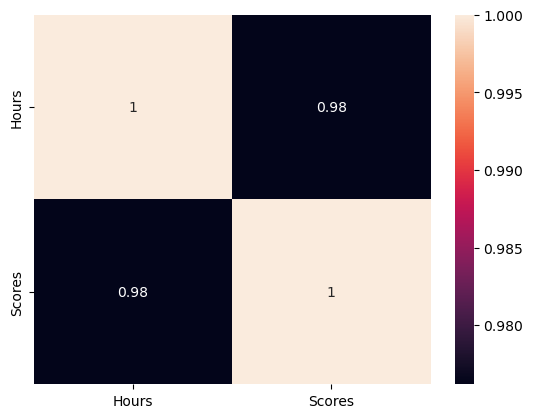

In [9]:
sns.heatmap(data.corr(),annot=True)

# model training

In [10]:
x = data.drop('Scores',axis=True) 
y = data['Scores']  

In [11]:
 x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

In [12]:
model = LinearRegression()  
model.fit(x_train, y_train) 

LinearRegression()

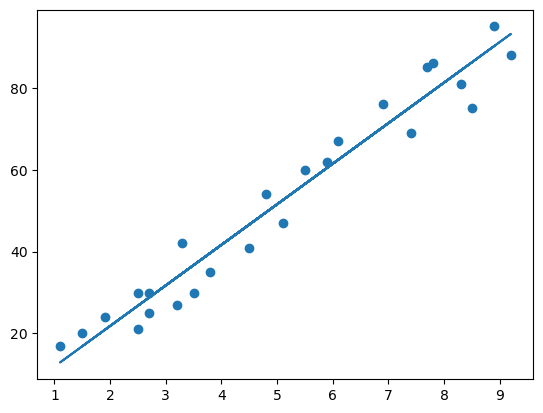

In [13]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [14]:
print(x_test) # Testing data - In Hours
y_pred = model.predict(x_test)  # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [16]:
model = LinearRegression()  
model.fit(x_train, y_train) 
hours = np.array([[9.25]])
pre=model.predict(hours)

print(f"no of hours ={hours[0][0]}")
print(f"predicted score ={pre[0]}")

no of hours =9.25
predicted score =93.69173248737539


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
y_pred = model.predict(x_train)

mse = mean_squared_error(y_train,y_pred)
print(f"MSE = {mse}")

mae = mean_absolute_error(y_train,y_pred)
print(f"MAE = {mae}")

r2 = r2_score(y_train,y_pred)
print(f"R-Sequared Score = {r2}")

MSE = 30.898182377314544
MAE = 5.186601709180373
R-Sequared Score = 0.9515510725211552


In [18]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print(f"MSE = {mse}")

mae = mean_absolute_error(y_test,y_pred)
print(f"MAE = {mae}")

r2 = r2_score(y_test,y_pred)
print(f"R-Sequared Score = {r2}")

MSE = 21.598769307217456
MAE = 4.183859899002982
R-Sequared Score = 0.9454906892105354
